In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Initialize Faker
fake = Faker()

# Number of samples
data_size = 10000

# Generate synthetic data
np.random.seed(42)

age = np.random.randint(18, 80, data_size)
bmi = np.random.uniform(15, 40, data_size).round(1)
bp = np.random.randint(80, 180, data_size)
heart_rate = np.random.randint(50, 120, data_size)
blood_sugar = np.random.randint(70, 200, data_size)
cholesterol = np.random.randint(100, 300, data_size)

# Define health condition based on thresholds
def classify_health(bmi, bp, heart_rate, blood_sugar, cholesterol):
    if bmi < 25 and bp < 120 and heart_rate < 80 and blood_sugar < 100 and cholesterol < 200:
        return "Healthy"
    elif bmi < 30 and bp < 140 and heart_rate < 90 and blood_sugar < 130 and cholesterol < 250:
        return "At Risk"
    else:
        return "High Risk"

# Define specific health risks
def determine_health_risk(bmi, bp, blood_sugar, cholesterol):
    risks = []
    if bmi >= 30:
        risks.append("Obesity")
    if bp >= 140:
        risks.append("Hypertension")
    if blood_sugar >= 130:
        risks.append("Diabetes")
    if cholesterol >= 250:
        risks.append("Heart Disease")
    
    if not risks:
        return "No Risk"
    return ", ".join(risks)

health_condition = [classify_health(bmi[i], bp[i], heart_rate[i], blood_sugar[i], cholesterol[i]) for i in range(data_size)]
health_risk = [determine_health_risk(bmi[i], bp[i], blood_sugar[i], cholesterol[i]) for i in range(data_size)]

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'BMI': bmi,
    'Blood Pressure': bp,
    'Heart Rate': heart_rate,
    'Blood Sugar': blood_sugar,
    'Cholesterol': cholesterol,
    'Health Condition': health_condition,
    'Health Risk': health_risk
})

In [4]:
# Save to CSV
df.to_csv("synthetic_health_data.csv", index=False)

# Display first few rows
df.head()

,Age,BMI,Blood Pressure,Heart Rate,Blood Sugar,Cholesterol,Health Condition,Health Risk
0,56,32.4,110,97,133,110,High Risk,"Obesity, Diabetes"
1,69,38.6,141,81,104,135,High Risk,"Obesity, Hypertension"
2,46,39.9,87,73,91,179,High Risk,Obesity
3,32,26.3,109,52,95,123,At Risk,No Risk
4,60,21.3,156,76,189,267,High Risk,"Hypertension, Diabetes, Heart Disease"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   BMI               10000 non-null  float64
 2   Blood Pressure    10000 non-null  int64  
 3   Heart Rate        10000 non-null  int64  
 4   Blood Sugar       10000 non-null  int64  
 5   Cholesterol       10000 non-null  int64  
 6   Health Condition  10000 non-null  object 
 7   Health Risk       10000 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


/var/folders/xm/cfp95rj579dg24p7ff2nym5m0000gn/T/ipykernel_64911/1004112333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Health Condition', data=df, palette='coolwarm')


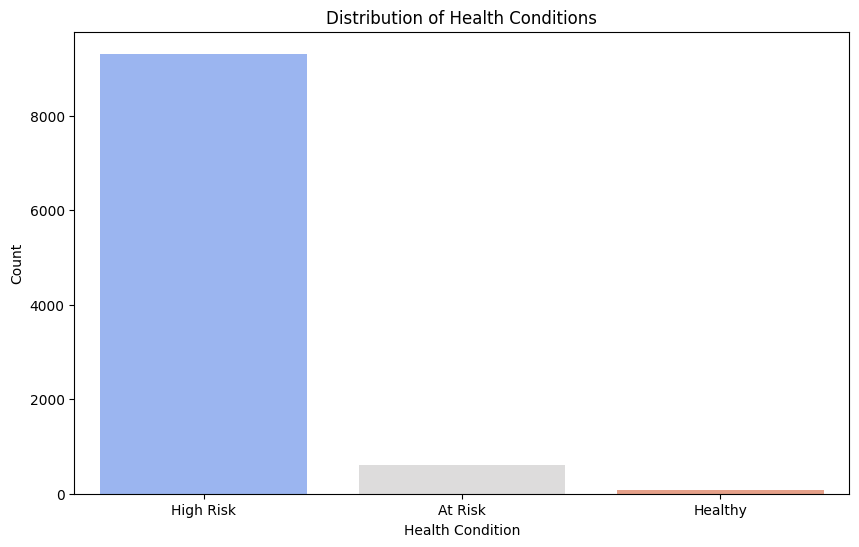

In [6]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Health Condition', data=df, palette='coolwarm')
plt.title('Distribution of Health Conditions')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.show()

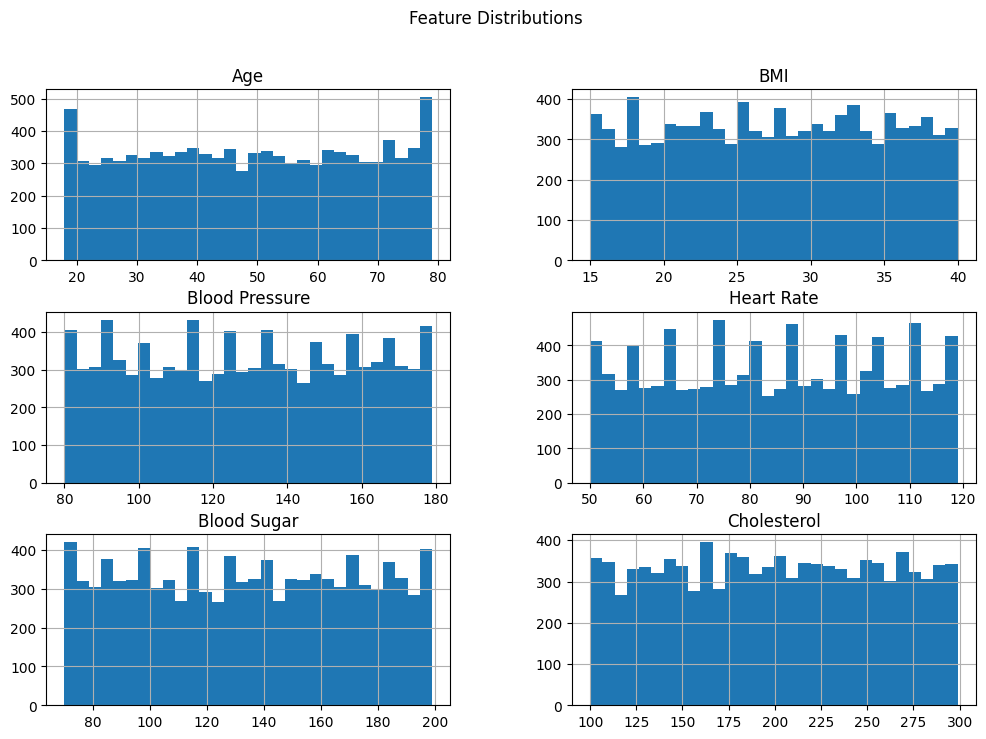

In [7]:
# Histograms of Features
df[['Age', 'BMI', 'Blood Pressure', 'Heart Rate', 'Blood Sugar', 'Cholesterol']].hist(figsize=(12, 8), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

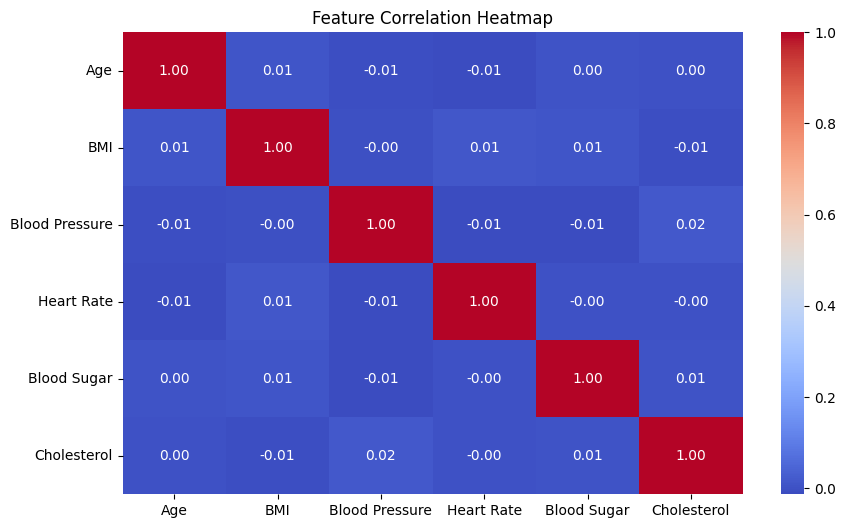

In [8]:

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'BMI', 'Blood Pressure', 'Heart Rate', 'Blood Sugar', 'Cholesterol']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [9]:
# Encode target variable
label_encoder = LabelEncoder()
df['Health Condition'] = label_encoder.fit_transform(df['Health Condition'])

In [10]:
# Select features and target
X = df[['Age', 'BMI', 'Blood Pressure', 'Heart Rate', 'Blood Sugar', 'Cholesterol']]
y = df['Health Condition']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       112
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00      1874

    accuracy                           1.00      2000
   macro avg       0.99      0.93      0.95      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[ 111    0    1]
 [   3   11    0]
 [   0    0 1874]]
